In [1]:
#!pip install obspy

In [2]:
### RESTART KERNEL...to find installed module
import numpy as np
import matplotlib.pyplot as plt
from obspy import read

In [3]:
# Loop through each SEG2 file representing a shot
seg2_data = read('data/1010.dat', format='SEG2')  # Load the SEG2 file

dt=seg2_data[0].stats.delta
nt=seg2_data[0].stats.npts
nx=len(seg2_data)
    # Create a numpy array to store the trace data for the shot
cmp=np.zeros((nt,nx))
offsets=np.zeros((nx))

# Iterate through the traces for the current shot and store their data
for j in range(nx):
    cmp[:,j] = seg2_data[j].data  
    offsets[j] = float(seg2_data[j].stats.seg2['RECEIVER_LOCATION'])

srcloc=float(seg2_data[j].stats.seg2['SOURCE_LOCATION'])
offsets=offsets-srcloc
print(offsets)

[-72. -70. -68. -66. -64. -62. -60. -58. -56. -54. -52. -50. -48. -46.
 -44. -42. -40. -38. -36. -34. -32. -30. -28. -26. -24. -22. -20. -18.
 -16. -14. -12. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.
  12.  14.  16.  18.  20.  22.]


/opt/conda/lib/python3.10/site-packages/obspy/io/seg2/seg2.py:365: UserWarning: Many companies use custom defined SEG2 header variables. This might cause basic header information reflected in the single traces' stats to be wrong (e.g. recording delays, first sample number, station code names, ..). Please check the complete list of additional unmapped header fields that gets stored in Trace.stats.seg2 and/or the manual of the source of the SEG2 files for fields that might influence e.g. trace start times.
  warnings.warn(WARNING_HEADER)


2.0


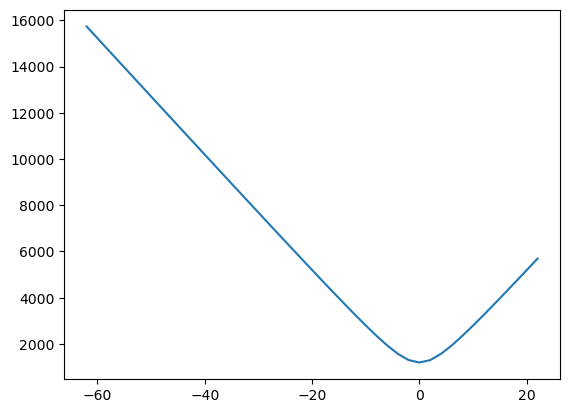

In [4]:
################
c=2000 #limestone m/s
reflectordepth=300 #maybe
t_0=reflectordepth/c
t_h=np.zeros(nx)
for j, x in enumerate(offsets):
    t_h[j] = np.sqrt(t_0**2 + x**2/c*2)/dt  # m/s / (s/sample)

t_hs = np.around(t_h, decimals=0, out=None) # hyperbol in samples
####throw a way where t_h has higher timewindows as recorded...

offsets=offsets[(t_hs<=nt)]
t_hs=t_hs[(t_hs<=nt)]

plt.plot(offsets,t_hs)
TWT=nt*dt
print(TWT)

In [5]:
nmo=np.zeros((nt,len(t_hs)))

In [6]:
for j in range(len(t_hs)):
    nmo[:,j]=np.concatenate(( cmp[int(t_hs[j])::,j], np.zeros(int( t_hs[j] )) )) 

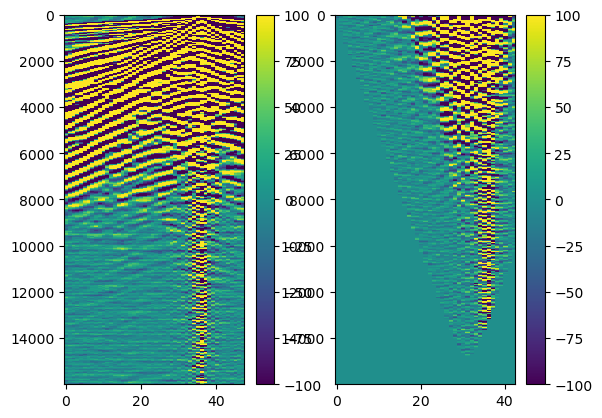

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
cc=plt.imshow(cmp,aspect='auto', interpolation='none')
plt.colorbar(cc)
plt.clim(-100,100)  
ax = fig.add_subplot(1, 2, 2)
cc=plt.imshow(nmo ,aspect='auto', interpolation='none')
plt.colorbar(cc)
#plt.pcolor(X, Y, v, cmap=cm)
plt.clim(-100,100)  